In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = ['race_id', 'circuit_id', 'year', 'round', 'race_length', 'driver_id', 'lap', 'position', 'milliseconds', 'pit_stop_count', 'pit_stop_milliseconds', 'pit_stop', 'rating', 'fcy', 'battle', 'next_lap_time', 'fitted_tire', 'tire_age', 'starting_position', 'gap_from_the_car_in_front', 'gap_from_the_following_car', 'lap_time_of_the_car_in_front', 'lap_time_of_the_following_car', 'drs']

In [3]:
file_path = 'data/new/2020_british_data.csv'

# Load data
dataFrame = pd.read_csv(file_path, names=headers, header=0)
dataFrame.shape

(897, 24)

In [4]:
dataFrame = dataFrame.drop(columns=['circuit_id', 'year', 'race_id', 'round', 'pit_stop_milliseconds', 'milliseconds', 'rating', 'fcy', 'battle', 'next_lap_time', 'tire_age', 'gap_from_the_car_in_front', 'gap_from_the_following_car', 'lap_time_of_the_car_in_front', 'lap_time_of_the_following_car', 'drs'])
dataFrame['race_length'] = dataFrame['race_length'].astype(float)
dataFrame['driver_id'] = dataFrame['driver_id'].astype(float)
dataFrame['lap'] = dataFrame['lap'].astype(float)
dataFrame['position'] = dataFrame['position'].astype(float)
dataFrame['pit_stop_count'] = dataFrame['pit_stop_count'].astype(float)
dataFrame['pit_stop'] = dataFrame['pit_stop'].astype(float)
dataFrame['fitted_tire'] = dataFrame['fitted_tire'].astype(str)
dataFrame['starting_position'] = dataFrame['starting_position'].astype(float)
dataFrame.head()

,race_length,driver_id,lap,position,pit_stop_count,pit_stop,fitted_tire,starting_position
0,52.0,44.0,1.0,1.0,1.0,0.0,MEDIUM,1.0
1,52.0,44.0,2.0,1.0,1.0,0.0,MEDIUM,1.0
2,52.0,44.0,3.0,1.0,1.0,0.0,MEDIUM,1.0
3,52.0,44.0,4.0,1.0,1.0,0.0,MEDIUM,1.0
4,52.0,44.0,5.0,1.0,1.0,0.0,MEDIUM,1.0


In [5]:
race_length = dataFrame['race_length'].unique()[0]
top_5_drivers = dataFrame[dataFrame['position'].isin([1, 2, 3, 4, 5]) & (dataFrame['lap'] == race_length)]['driver_id'].unique()

In [6]:
drivers_data = {}
for driver_id in top_5_drivers:
    data = dataFrame[(dataFrame['driver_id'] == driver_id)]
    tire_data = []
    count = 1
    for i in range(1, len(data)):
        if data['pit_stop'].iloc[i] == 1:
            tire_data.append({ data['fitted_tire'].iloc[i-1]: count })
            count = 1
        else:
            count += 1
    tire_data.append({ data['fitted_tire'].iloc[-1]: count })
    drivers_data[int(driver_id)] = tire_data

drivers_data

{44: [{'MEDIUM': 13}, {'HARD': 39}],
 33: [{'MEDIUM': 13}, {'HARD': 37}, {'SOFT': 2}],
 16: [{'MEDIUM': 13}, {'HARD': 39}],
 3: [{'SOFT': 12}, {'HARD': 40}],
 4: [{'SOFT': 12}, {'HARD': 40}]}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


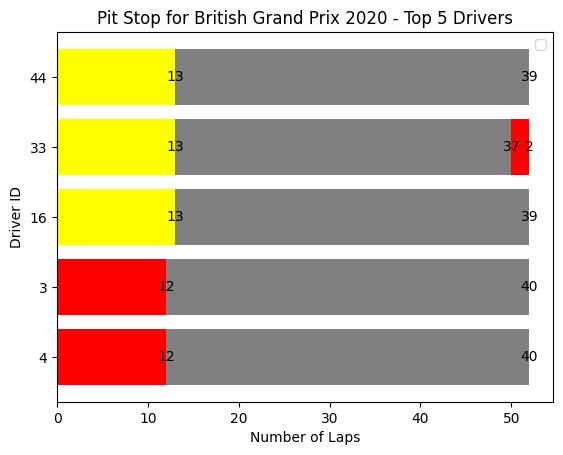

In [7]:
color_map = {'SOFT': 'red', 'MEDIUM': 'yellow', 'HARD': 'grey', 'INTER': 'green', 'WET': 'blue'}

plt.figure()
count = len(drivers_data.keys()) - 1
for driver_id, data in drivers_data.items():
    left = 0
    for i, tire in enumerate(data):
        for key, value in tire.items():
            plt.barh(count, value, left=left, color=color_map[key])
            plt.text(left + value, count, value, ha='center', va='center')
            left += value
    count -= 1

yticks = np.arange(len(drivers_data.keys()))
plt.yticks(yticks, reversed(list(drivers_data.keys())))

plt.xlabel('Number of Laps')
plt.ylabel('Driver ID')
plt.title('Pit Stop for British Grand Prix 2020 - Top 5 Drivers')
plt.legend(loc='upper right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


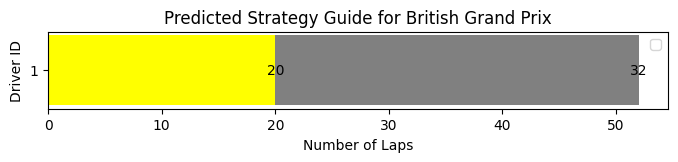

In [8]:
predicted_data = {
    1: [
        {'MEDIUM': 20},
        {'HARD': 32}
    ]
}

plt.figure(figsize=(8, 1))
count = len(predicted_data.keys()) - 1
for driver_id, data in predicted_data.items():
    left = 0
    for i, tire in enumerate(data):
        for key, value in tire.items():
            plt.barh(count, value, left=left, color=color_map[key])
            plt.text(left + value, count, value, ha='center', va='center')
            left += value
    count -= 1

yticks = np.arange(len(predicted_data.keys()))
plt.yticks(yticks, reversed(list(predicted_data.keys())))

plt.xlabel('Number of Laps')
plt.ylabel('Driver ID')
plt.title('Predicted Strategy Guide for British Grand Prix')
plt.legend(loc='upper right')
plt.show()